Advanced Statistics for Physics Analysis 2022-23

# Lab 3: Inference

Antonio Feltrin, Student ID 2097126

antonio.feltrin@studenti.unipd.it

## Ex. 1

Study the binomial inference for a study that reports $y=7$ successes in $n=20$ independent trial. Assume the following priors $g$:
-  a uniform distribution
-  a Jeffrey’s prior
-  a step function:

$
g(x) =
    \begin{cases}
        x      \hspace{14 mm} \text{if} \hspace{5 mm} x ≤ 0.2 \\
        0.2      \hspace{12 mm} \text{if} \hspace{5 mm} 0.2 < x ≤ 0.3 \\
        0.5 − x  \hspace{6  mm} \text{if} \hspace{5 mm} 0.3 < x ≤ 0.5 \\
        0        \hspace{15 mm} \text{if} \hspace{5 mm} 0.5 < x
    \end{cases}
$

1. Plot the posterior distribution and summarize the results computing the first two moments

2. Compute a 95% credibility interval and give the results in a summary table

3. Draw the limits on the plot of the posterior distribution

``(From AdvStat 4 PhysAna - AA 2022-2023 Stat-Lect. 5, slides 10-onwards)``

Thanks to Bayes' Theorem, the posterior is proportional to the product of the likelihood and the prior:

$$ P(\pi | n,y,M) \propto f(n,y | \pi, M) \times g(\pi | M) $$

Since the experiment is a repeated bernoulli trial, a binomial distribution will be chosen as likelihood.

The posterior will also be a Beta function with parameters:

$$ \alpha = \alpha_p + r \qquad \text{and} \qquad \beta = \beta_p + n - r$$

With $\alpha_p$ and $\beta_p$ being the parameters from the prior.

We know also that for a Beta distribution
$$ \text{mean = } \frac{\alpha_p + r}{\alpha_p + \beta_p + n} \qquad \text{and} \qquad \text{mode = } \frac{\alpha_p + r -1}{\alpha_p + \beta_p + n -2} $$

In [1]:
beta.mean <- function(alpha,beta,n,r)  { #mean for the posterior of a beta prior, bernoulli likelihood
    b.mean = (alpha+r)/(alpha+beta+n)   #takes alpha,beta from prior as input
    return(b.mean)
}

beta.mode <- function(alpha,beta,n,r) { #mode ''
    b.mode = (alpha+r-1)/(alpha+beta+n-2)
    return(b.mode)
}

In [2]:
n <- 20
r <- 7
N1 <- 2001

interval1 <- c(0,1)
x1 <- seq(interval1[1],interval1[2],length.out=N1)
dx1 <- (interval1[2] - interval1[1])/N1

jalpha = 0.5
jbeta = 0.5

gprior <- function(x) {
    gx = 0
    ifelse(x<=0.2,gx<-x,
        ifelse(x<=0.3,gx<-0.2,
                ifelse(x<=0.5,gx<-0.5-x,gx<-0)
            )
        )
    return(gx)
}
gx1 <- x1
for (i in 1:N1){
    gx1[i] <- gprior(x1[i])
}

In [3]:
#2.1 Finding posteriors

#uniform prior
p.prior1.u <- dbeta(x1,1,1)
p.like1 <- dbinom(x=r, size=n,prob=x1)
p.like1 <- p.like1/(sum(p.like1)*dx1) #normalization to 1

u.post.alpha <-r+1
u.post.beta <- n-r+1 

p.post1.u <- dbeta(x1,u.post.alpha,u.post.beta)
p.post1.u <- p.post1.u/(sum(p.post1.u)*dx1)


#beta (jeffrey's) prior
p.prior1.j <- dbeta(x1,jbeta,jalpha)

j.post.alpha <-r+jalpha
j.post.beta <- n-r+jbeta 

p.post1.j <- dbeta(x1,j.post.alpha,j.post.beta)
p.post1.j <- p.post1.j/(sum(p.post1.j)*dx1)

#step prior
p.prior1.s <- gx1/sum(gx1*dx1)

post1 <- gx1
for(i in 1:N1) {
    post1[i] <- gx1[i] * p.like1[i] * dx1
}
p.post1.s <- post1/sum(post1*dx1)

In [4]:
#2.2 moments
#we need the normalization factor only if we want to calculate expected values: i.e. mean and variance
# need i remind u, the 2nd moment should be p(1-p)

u.mom1 <- sum(x1*p.post1.u) *dx1 
u.mom2 <- sum(x1*x1*p.post1.u) *dx1
u.bmean <- beta.mean(1,1,n,r)
u.bmode <- beta.mode(1,1,n,r)

j.mom1 <- sum(x1*p.post1.j) *dx1
j.mom2 <- sum(x1*x1*p.post1.j) *dx1
j.bmean <- beta.mean(jalpha,jbeta,n,r)
j.bmode <- beta.mode(jalpha,jbeta,n,r)


s.mom1 <- sum(x1*p.post1.s) *dx1
s.mom2 <- sum(x1*x1*p.post1.s) *dx1

In [5]:
#quantiles
q=0.025

u.left <- qbeta(q,u.post.alpha,u.post.beta)
u.right <- qbeta(1-q,u.post.alpha,u.post.beta)

j.left <- qbeta(q,j.post.alpha,j.post.beta)
j.right <- qbeta(1-q,j.post.alpha,j.post.beta)

cum.s <- cumsum(p.post1.s)/sum(p.post1.s)
s.left.i <- min(which(abs(cum.s-0.025)<0.001))
s.left <- s.left.i*dx1
s.right.i <- max(which(abs(cum.s-0.975)<0.001))
s.right <- s.right.i*dx1
s.mode <- which(p.post1.s==max(p.post1.s))*dx1

cat(' - - - - Uniform prior - - - - \n')
cat('The best estimate of π is the mode of the posterior: π = r/n = ', u.bmode, 'with the 95% Confidence Interval being [',u.left,',',u.right,']\n')
cat('Mean of the posterior is',u.bmean,'and Mode = ',u.bmode,'\n')
cat('The first two moments are: ',u.mom1,'and the 2nd moment is ',u.mom2,'\n')

cat(' - - - - Jeffrey\'s prior - - - - \n')
cat('The best estimate of π is the mode of the posterior: π = ', j.bmode, 'with the 95% Confidence Interval being [',j.left,',',j.right,']\n')
cat('Mean of the posterior is',j.bmean,'and Mode = ',j.bmode,'\n')
cat('The first two moments are: ',j.mom1,'and the 2nd moment is ',j.mom2,'\n')

cat(' - - - - Step function prior - - - - \n')
cat('The best estimate of π is the mode of the posterior: π = ', s.mode, 'with the 95% Confidence Interval being [',s.left,',',s.right,']\n')
cat('Mean of the posterior is',s.mom1,'and variance = ',s.mom2-s.mom1**2,'\n')
cat('The first two moments are: ',s.mom1,'and the 2nd moment is ',j.mom2,'\n')

 - - - - Uniform prior - - - - 
The best estimate of π is the mode of the posterior: π = r/n =  0.35 with the 95% Confidence Interval being [ 0.1810716 , 0.5696755 ]
Mean of the posterior is 0.3636364 and Mode =  0.35 
The first two moments are:  0.3636364 and the 2nd moment is  0.1422925 
 - - - - Jeffrey's prior - - - - 
The best estimate of π is the mode of the posterior: π =  0.3421053 with the 95% Confidence Interval being [ 0.1722762 , 0.5677661 ]
Mean of the posterior is 0.3571429 and Mode =  0.3421053 
The first two moments are:  0.3571429 and the 2nd moment is  0.137987 
 - - - - Step function prior - - - - 
The best estimate of π is the mode of the posterior: π =  0.3003498 with the 95% Confidence Interval being [ 0.1744128 , 0.4482759 ]
Mean of the posterior is 0.3120454 and variance =  0.004998754 
The first two moments are:  0.3120454 and the 2nd moment is  0.137987 


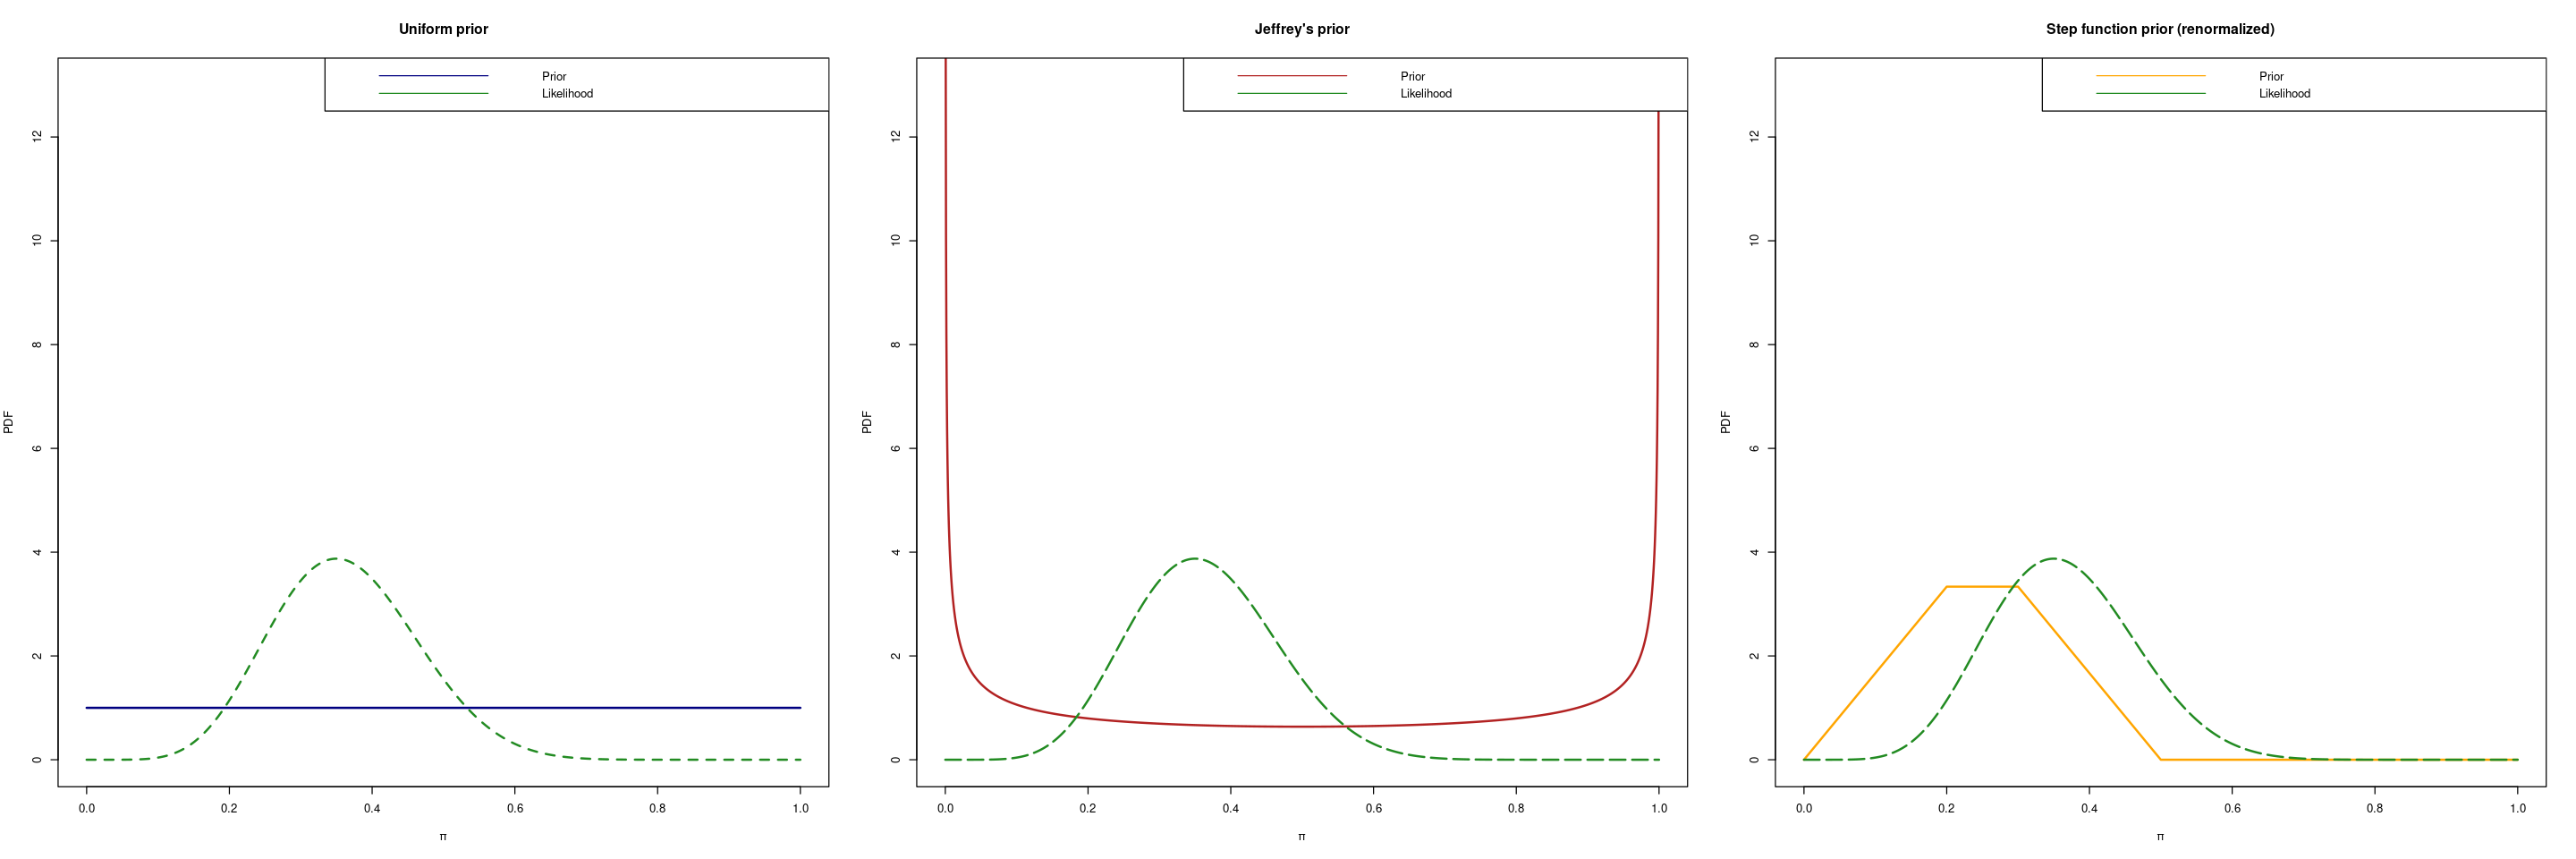

In [6]:
library(scales)

layout(mat = matrix(c(1, 2, 3), 
                        nrow = 1, 
                        ncol = 3),
       heights = c(2),    # Heights of the two rows
       widths = c(2, 2, 2))     # Widths of the two columns

options(repr.plot.width=24, repr.plot.height=8)

#PRIORS
#par(new=TRUE)
plot(x1, p.prior1.u,
col='navy',
type='l', lty=1, lwd = 2,
ylim=c(0,13),
xlim=c(0,1),
main='Uniform prior',
xlab="π",
ylab='PDF')

lines(x1,p.like1, col='forestgreen',lwd=2,lty=2)
legend('topright', c('Prior','Likelihood'), col=c('navy','forestgreen'), lty=c(1,1), bty = 'o')

plot(x1, p.prior1.j,
col='firebrick',
type='l', lty=1, lwd = 2,
ylim=c(0,13),
xlim=c(0,1),
main='Jeffrey\'s prior',
xlab="π",
ylab='PDF')
lines(x1,p.like1, col='forestgreen',lwd=2,lty=5)
legend('topright', c('Prior','Likelihood'), col=c('firebrick','forestgreen'), lty=c(1,1), bty = 'o')


plot(x1, p.prior1.s,
col='orange',
type='l', lty=1, lwd = 2,
ylim=c(0,13),
xlim=c(0,1),
main='Step function prior (renormalized)',
xlab="π",
ylab='PDF')
lines(x1,p.like1, col='forestgreen',lwd=2,lty=5)
legend('topright', c('Prior','Likelihood'), col=c('orange','forestgreen'), lty=c(1,1), bty = 'o')

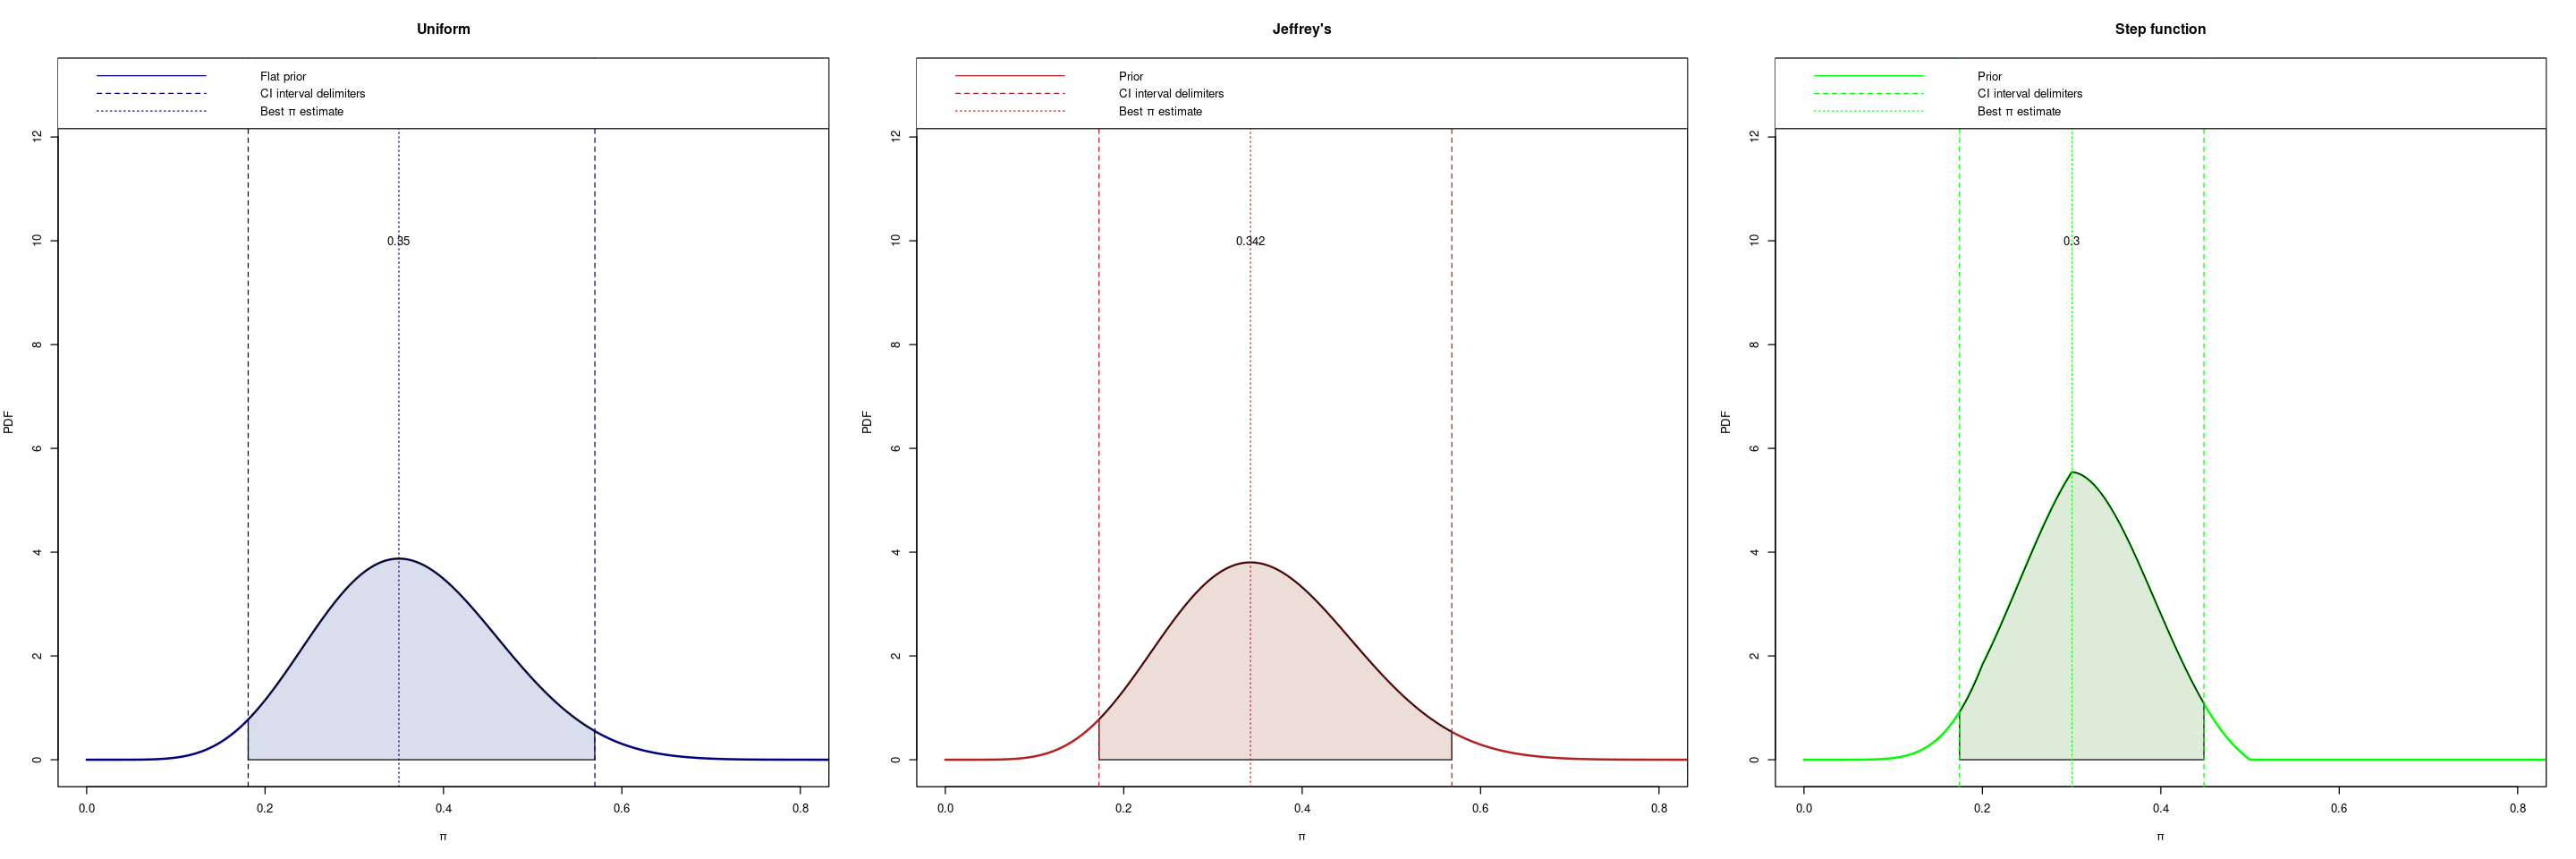

In [7]:
layout(mat = matrix(c(1, 2, 3), 
                        nrow = 1, 
                        ncol = 3),
       heights = c(2),    # Heights of the two rows
       widths = c(2, 2, 2))     # Widths of the two columns

options(repr.plot.width=24, repr.plot.height=8)


#POSTERIORS
plot(x1, p.post1.u,
col='navy',
type='l', lty=1, lwd = 2,
ylim=c(0,13),
xlim=c(0.,0.8),
main='Uniform',
xlab="π",
ylab='PDF')
x1.95u <- seq(u.left, u.right, by=dx1)
polygon(x = c(u.left,x1.95u,u.right),
       y = c(0,dbeta(x1.95u,u.post.alpha,u.post.beta),0),
       col=alpha('#9daed1',0.4))
abline(v=u.left,lty=2,lwd=1,col='navy')
abline(v=u.right,lty=2,lwd=1,col='navy')
abline(v=u.bmode,lty=3,lwd=1,col='navy')
text(x=u.bmode,y=10,label=round(u.bmode,3))
legend('topright', c('Flat prior','CI interval delimiters','Best π estimate'), col='navy', lty=c(1,2,3), bty ='o')

plot(x1, p.post1.j,
col='firebrick',
type='l', lty=1, lwd = 2,
ylim=c(0,13),
xlim=c(0.,0.8),
main='Jeffrey\'s',
xlab="π",
ylab='PDF')
x1.95j <- seq(j.left, j.right, by=dx1)
polygon(x = c(j.left,x1.95j,j.right),
       y = c(0,dbeta(x1.95j,j.post.alpha,j.post.beta),0),
       col=alpha('#d1ab9d',0.4))
abline(v=j.left,lty=2,lwd=1,col='firebrick')
abline(v=j.right,lty=2,lwd=1,col='firebrick')
abline(v=j.bmode,lty=3,lwd=1,col='firebrick')
text(x=j.bmode,y=10,label=round(j.bmode,3))
legend('topright', c('Prior','CI interval delimiters','Best π estimate'), col='firebrick', lty=c(1,2,3), bty ='o')


plot(x1, p.post1.s,
col='green',
type='l', lty=1, lwd = 2,
ylim=c(0,13),
xlim=c(0.,0.8),
main='Step function',
xlab="π",
ylab='PDF')
x1.95s <- seq(s.left, s.right, by=dx1)
polygon(x = c(s.left,x1.95s,s.right),
       y = c(0,p.post1.s[s.left.i:s.right.i],0),
       col=alpha('#a9d19d',0.4))
abline(v=s.left,lty=2,lwd=1,col='green')
abline(v=s.right,lty=2,lwd=1,col='green')
abline(v=s.mode,lty=3,lwd=1,col='green')
text(x=s.mode,y=10,label=round(s.mode,3))
legend('topright', c('Prior','CI interval delimiters','Best π estimate'), col='green', lty=c(1,2,3), bty ='o')


We can observe that the Step function gives a posterior which is quite different from the others. Yet, its prior resembled the most a bell-like curve, which is the shape of the posterior of the others. However, the Step prior was not aligned with the best $\pi$ obtained by the first two, and this conflict led to the posterior being askew.

# Ex 2: Parasite infection

Giardia cysts is a parasite that can contaminate food, water, and surfaces, and they can cause giardiasis when swallowed in this infective stage of their life cycle. Infection occurs when a person swallows Giardia cysts from contaminated water, food, hands, surfaces, or objects.
- A group of researchers, working for a Human Health Department, work for determining the qualityof stream water. They take $n=116$ samples of one-liter water from sites identified to have a heavy environmental impact from birds and waterflow.

1. out of these samples, $y=17$ samples contained Giard cystis. Assuming $\pi$ as the probability that one-liter water sample contains Giardia cystis, find the posterior distribution for $\pi$:
    - assuming a uniform prior distribution
    - assuming a Beta(1,4)prior


2. plot the posterior distribution and summarize the results computing the first two moments
3. find a normal approximation for the posterior $g(\pi∣y)$
4. compute a $95\%$ credibility interval both for the original posterior and for the normal approximation,giving the results in a summary table
#since i have many events, post ~ gaub so i must search a mu, sigma somwhere in the post
5. add the limits on the plot of the posterior distributions

**Solution**: I am going to assume a Bernoulli process for the event 'water is contaminated'. We have $y=17$ findings in $n=116$ trials. 

In [8]:
#params
N2 <- 2001
n <- 116
y <- 17
interval2 <- c(0,1)
x2 <- seq(interval2[1],interval2[2],length.out=N2)
dx2 <- (interval2[2] - interval2[1])/N2

#2.1 Finding posteriors
#uniform prior
p.prior2.u <- dbeta(x2,1,1)

p.like2.u <- dbinom(x=y, size=n,prob=x2)
p.like2.u <- p.like2.u/(sum(p.like2.u)*dx2) #normalization to 1

u.post.alpha <-y+1
u.post.beta <- n-y+1 

p.post2.u <- dbeta(x2,u.post.alpha,u.post.beta)
p.post2.u <- p.post2.u*(sum(p.post2.u)*dx2)


#beta prior
p.prior2.b <- dbeta(x2,1,4)

p.like2.b <- dbinom(x=y, size=n,prob=x2)
p.like2.b <- p.like2.b/(sum(p.like2.b)*dx2) #normalization to 1

b.post.alpha <-y+1
b.post.beta <- n-y+4 

p.post2.b <- dbeta(x2,b.post.alpha,b.post.beta)
p.post2.b <- p.post2.b*(sum(p.post2.b)*dx2)

In [9]:
#2.2 moments
#we need the normalization factor only if we want to calculate expected values: i.e. mean and variance

u.mom1 <- sum(x2*p.post2.u) *dx2 
u.mom2 <- sum(x2*x2*p.post2.u) *dx2
u.bmean <- beta.mean(1,1,n,y)
u.bmode <- beta.mode(1,1,n,y)

gaub2.u <- dnorm(x2,mean=u.bmean,sd=sqrt(u.mom2-u.mom1**2))

cat(' - - - - Uniform prior - - - - \n')
cat('Mean of the posterior is',u.bmean,'and Mode = ',u.bmode,'\n')
cat('The first two moments are: ',u.mom1,'and the 2nd moment is ',u.mom2,'\n')


b.mom1 <- sum(x2*p.post2.b) *dx2 
b.mom2 <- sum(x2*x2*p.post2.b) *dx2
b.bmean <- beta.mean(1,4,n,y)
b.bmode <- beta.mode(1,4,n,y)

gaub2.b <- dnorm(x2,mean=b.bmean,sd=sqrt(b.mom2-b.mom1**2))

cat(' - - - - (1,4) Beta prior - - - - \n')
cat('Mean of the posterior is',b.bmean,'and Mode = ',b.bmode,'\n')
cat('The first two moments are: ',b.mom1,'and the 2nd moment is ',b.mom2,'\n')

cat('mean u',u.bmean,'mean beta',b.bmean)

 - - - - Uniform prior - - - - 
Mean of the posterior is 0.1525424 and Mode =  0.1465517 
The first two moments are:  0.1523899 and the 2nd moment is  0.02433117 
 - - - - (1,4) Beta prior - - - - 
Mean of the posterior is 0.1487603 and Mode =  0.1428571 
The first two moments are:  0.1486117 and the 2nd moment is  0.02314444 
mean u 0.1525424 mean beta 0.1487603

In [10]:
#the normal approx is a gaussian of mean mom1 and variamce mom2-mom1**2
cat('The bernoulli variance = ',u.bmean*(1-u.bmean),', while textbook variance = E[p^2]-(E[p])^2 = ',u.mom1*(1-u.mom1))

The bernoulli variance =  0.1292732 , while textbook variance = E[p^2]-(E[p])^2 =  0.1291672

In [11]:
#quantiles
q=0.025

u.left <- qbeta(q,u.post.alpha,u.post.beta)
u.right <- qbeta(1-q,u.post.alpha,u.post.beta)

b.left <- qbeta(q,b.post.alpha,b.post.beta)
b.right <- qbeta(1-q,b.post.alpha,b.post.beta)

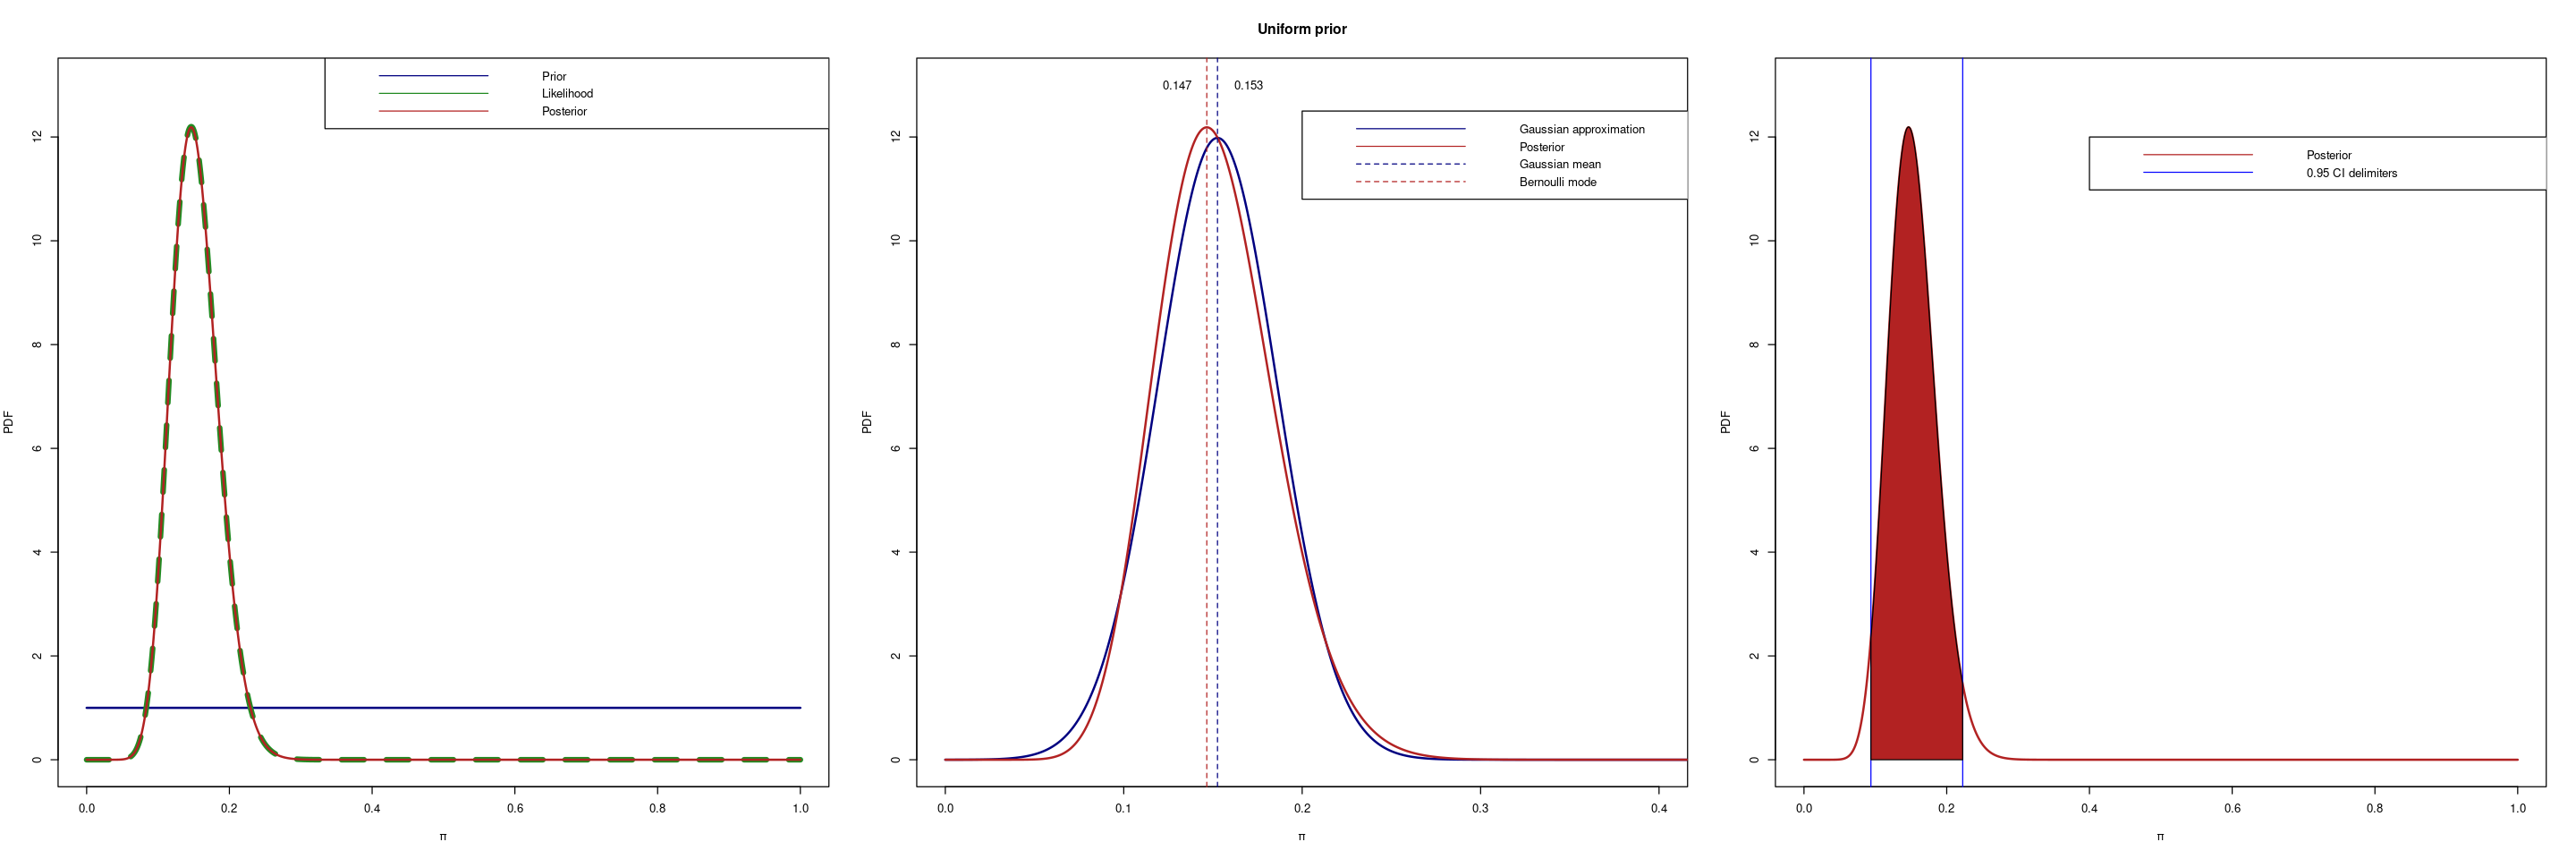

In [12]:
layout(mat = matrix(c(1, 2, 3), 
                        nrow = 1, 
                        ncol = 3),
       heights = c(2),    # Heights of the two rows
       widths = c(2,2,2))     # Widths of the two columns

options(repr.plot.width=24, repr.plot.height=8)

#UNIFORM
plot(x2, p.prior2.u,
col='navy',
type='l', lty=1, lwd = 2,
ylim=c(0,13),
xlim=c(0,1),
xlab="π",
ylab='PDF')
lines(x2,p.like2.u, col='forestgreen',lwd=5,lty=2)
lines(x2,p.post2.u, col='firebrick',lwd=2,lty=1)
legend('topright', c('Prior','Likelihood','Posterior'), col=c('navy','forestgreen','firebrick'), lty=1, bty = 'o')

plot(x2, gaub2.u,
col='navy',
type='l', lty=1, lwd = 2,
main='Uniform prior',
ylim=c(0,13),
xlim=c(0.,.4),
xlab="π",
ylab='PDF')
lines(x2,p.post2.u, col='firebrick',lwd=2,lty=1)
abline(v=u.bmean,lty=2,col='navy')
abline(v=u.bmode,lty=2,col='firebrick')
text(x=0.17,y=13,label=round(u.bmean,3))
text(x=0.13,y=13,label=round(u.bmode,3))
legend(x=0.2,y=12.5, c('Gaussian approximation','Posterior','Gaussian mean','Bernoulli mode'), 
col=c('navy','firebrick','navy','firebrick'), 
lty=c(1,1,2,2), bty = 'o')


plot(x2, p.post2.u,
col='firebrick',
type='l', lty=1, lwd = 2,
ylim=c(0,13),
xlim=c(0,1),
xlab="π",
ylab='PDF')
legend(x=0.4,y=12, c('Posterior','0.95 CI delimiters'), col=c('firebrick','blue'), lty=1, bty = 'o')
abline(v=u.left,col='blue',lwd=1)
abline(v=u.right,col='blue',lwd=1)

x2.95 = seq(u.left,u.right,by=dx2)
polygon(x = c(u.left,x2.95,u.right),
       y = c(0,dbeta(x2.95,u.post.alpha,u.post.beta),0),
       col='firebrick')

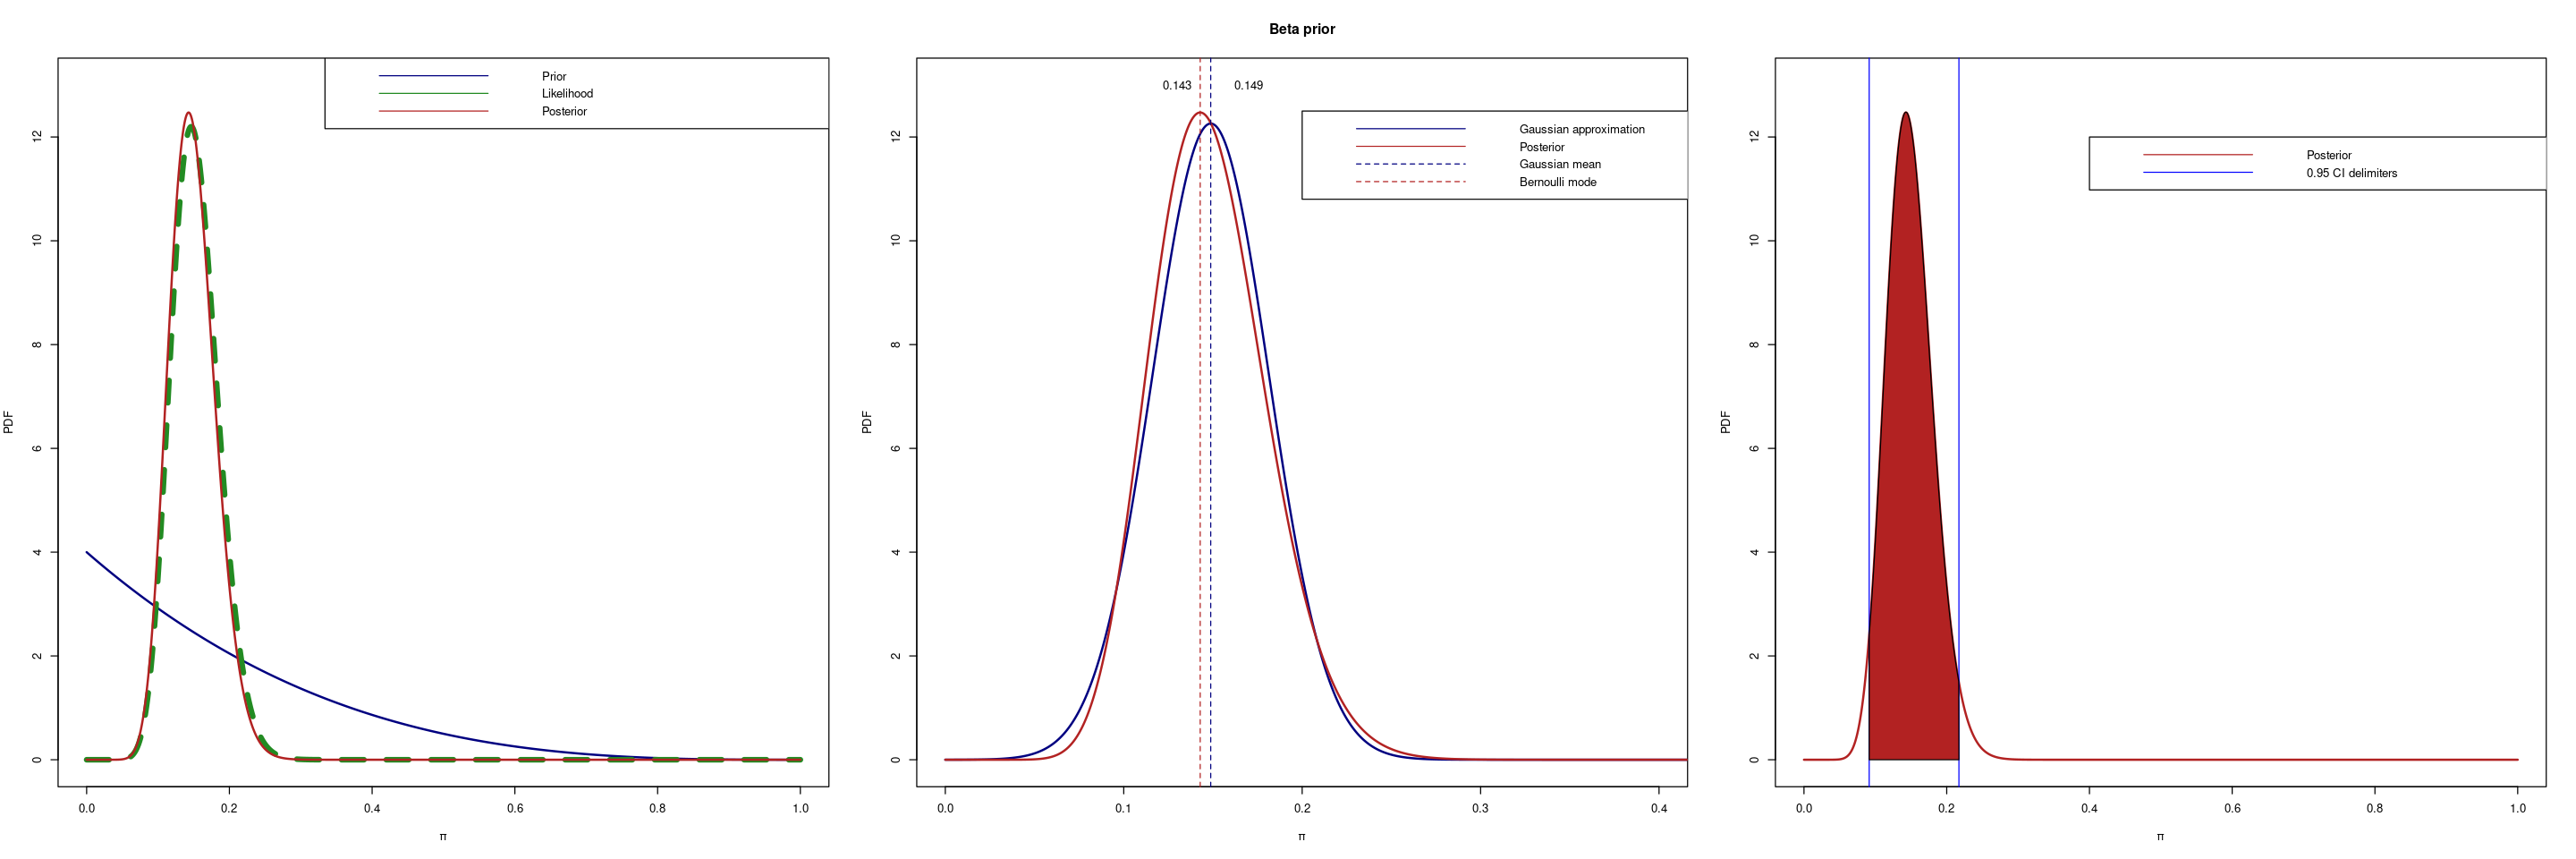

In [13]:
layout(mat = matrix(c(1, 2, 3), 
                        nrow = 1, 
                        ncol = 3),
       heights = c(2),    # Heights of the two rows
       widths = c(2, 2,2))     # Widths of the two columns


options(repr.plot.width=24, repr.plot.height=8)

#BETA
plot(x2, p.prior2.b,
col='navy',
type='l', lty=1, lwd = 2,
ylim=c(0,13),
xlim=c(0,1),
xlab="π",
ylab='PDF')
lines(x2,p.like2.b, col='forestgreen',lwd=5,lty=2)
lines(x2,p.post2.b, col='firebrick',lwd=2,lty=1)
legend('topright', c('Prior','Likelihood','Posterior'), col=c('navy','forestgreen','firebrick'), lty=1, bty = 'o')

plot(x2, gaub2.b,
col='navy',
type='l', lty=1, lwd = 2,
main='Beta prior',
ylim=c(0,13),
xlim=c(0.,.4),
xlab="π",
ylab='PDF')
lines(x2,p.post2.b, col='firebrick',lwd=2,lty=1)
abline(v=b.bmean,lty=2,col='navy')
abline(v=b.bmode,lty=2,col='firebrick')
text(x=0.17,y=13,label=round(b.bmean,3))
text(x=0.13,y=13,label=round(b.bmode,3))
legend(x=0.2,y=12.5, c('Gaussian approximation','Posterior','Gaussian mean','Bernoulli mode'), 
col=c('navy','firebrick','navy','firebrick'), 
lty=c(1,1,2,2), bty = 'o')

plot(x2, p.post2.b,
col='firebrick',
type='l', lty=1, lwd = 2,
ylim=c(0,13),
xlim=c(0,1),
xlab="π",
ylab='PDF')
legend(x=0.4,y=12, c('Posterior','0.95 CI delimiters'), col=c('firebrick','blue'), lty=1, bty = 'o')
abline(v=b.left,col='blue',lwd=1)
abline(v=b.right,col='blue',lwd=1)

x2.95 = seq(b.left,b.right,by=dx2)
polygon(x = c(b.left,x2.95,b.right),
       y = c(0,dbeta(x2.95,b.post.alpha,b.post.beta),0),
       col='firebrick')

options(repr.plot.width=4, repr.plot.height=4)

In [14]:
cat(' - - - - Uniform prior - - - - \n')
cat('The best estimate of π is the mode of the posterior: π = y/n = ', u.bmode, 'with the 95% Confidence Interval being [',u.left,',',u.right,']\n')

cat(' - - - - (1,4) Beta prior - - - - \n')
cat('The best estimate of π is the mode of the posterior: π = ', b.bmode, 'with the 95% Confidence Interval being [',b.left,',',b.right,']\n')

 - - - - Uniform prior - - - - 
The best estimate of π is the mode of the posterior: π = y/n =  0.1465517 with the 95% Confidence Interval being [ 0.09380263 , 0.2224163 ]
 - - - - (1,4) Beta prior - - - - 
The best estimate of π is the mode of the posterior: π =  0.1428571 with the 95% Confidence Interval being [ 0.09138957 , 0.2171069 ]


# Ex. 3: Coin flips

A coin is flipped $n=30$ times with the following outcomes:

T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H,H, H

1. Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions for the data set.

The most obvious choice for a beta prior would be something like $Beta(4,4)$, since it is a Gaussian-like profile with an expected value $p=0.5$. However, to further differentiate the beta from the uniform prior, I will use a non symmetric $Beta(3,5)$.

In [15]:
#params
N3 <- 2001
n <- 30
r <- 15
interval3 <- c(0,1)
x3 <- seq(interval3[1],interval3[2],length.out=N3)
dx3 <- (interval3[2] - interval3[1])/N3

#pdfs
#uniform prior
p.prior3.u <- dbeta(x3,1,1)

p.like3.u <- dbinom(x=r, size=n,prob=x3)
p.like3.u <- p.like3.u/(sum(p.like3.u)*dx3) #normalization to 1

u.post.alpha <-r+1
u.post.beta <- n-r+1 

p.post3.u <- dbeta(x3,u.post.alpha,u.post.beta)
p.post3.u <- p.post3.u/(sum(p.post3.u)*dx3)


#beta prior
alpha3 = 3
beta3 = 5
p.prior3.b <- dbeta(x3,alpha3,beta3)

p.like3.b <- dbinom(x=r, size=n,prob=x3)
p.like3.b <- p.like3.b/(sum(p.like3.b)*dx3) #normalization to 1

b.post.alpha <-r+alpha3
b.post.beta <- n-r+beta3

p.post3.b <- dbeta(x3,b.post.alpha,b.post.beta)
p.post3.b <- p.post3.b/(sum(p.post3.b)*dx3)

options(repr.plot.width=8, repr.plot.height=8)
#plot(x3,p.prior3.b)

u.bmean <- beta.mean(1,1,n,r)
u.bmode <- beta.mode(1,1,n,r)
b.bmean <- beta.mean(alpha3,beta3,n,r)
b.bmode <- beta.mode(alpha3,beta3,n,r)

#quantiles
q=0.025

u.left <- qbeta(q,u.post.alpha,u.post.beta)
u.right <- qbeta(1-q,u.post.alpha,u.post.beta)
u.median <- qbeta(.5,u.post.alpha,u.post.beta)
b.left <- qbeta(q,b.post.alpha,b.post.beta)
b.right <- qbeta(1-q,b.post.alpha,b.post.beta)
b.median <- qbeta(.5,b.post.alpha,b.post.beta)

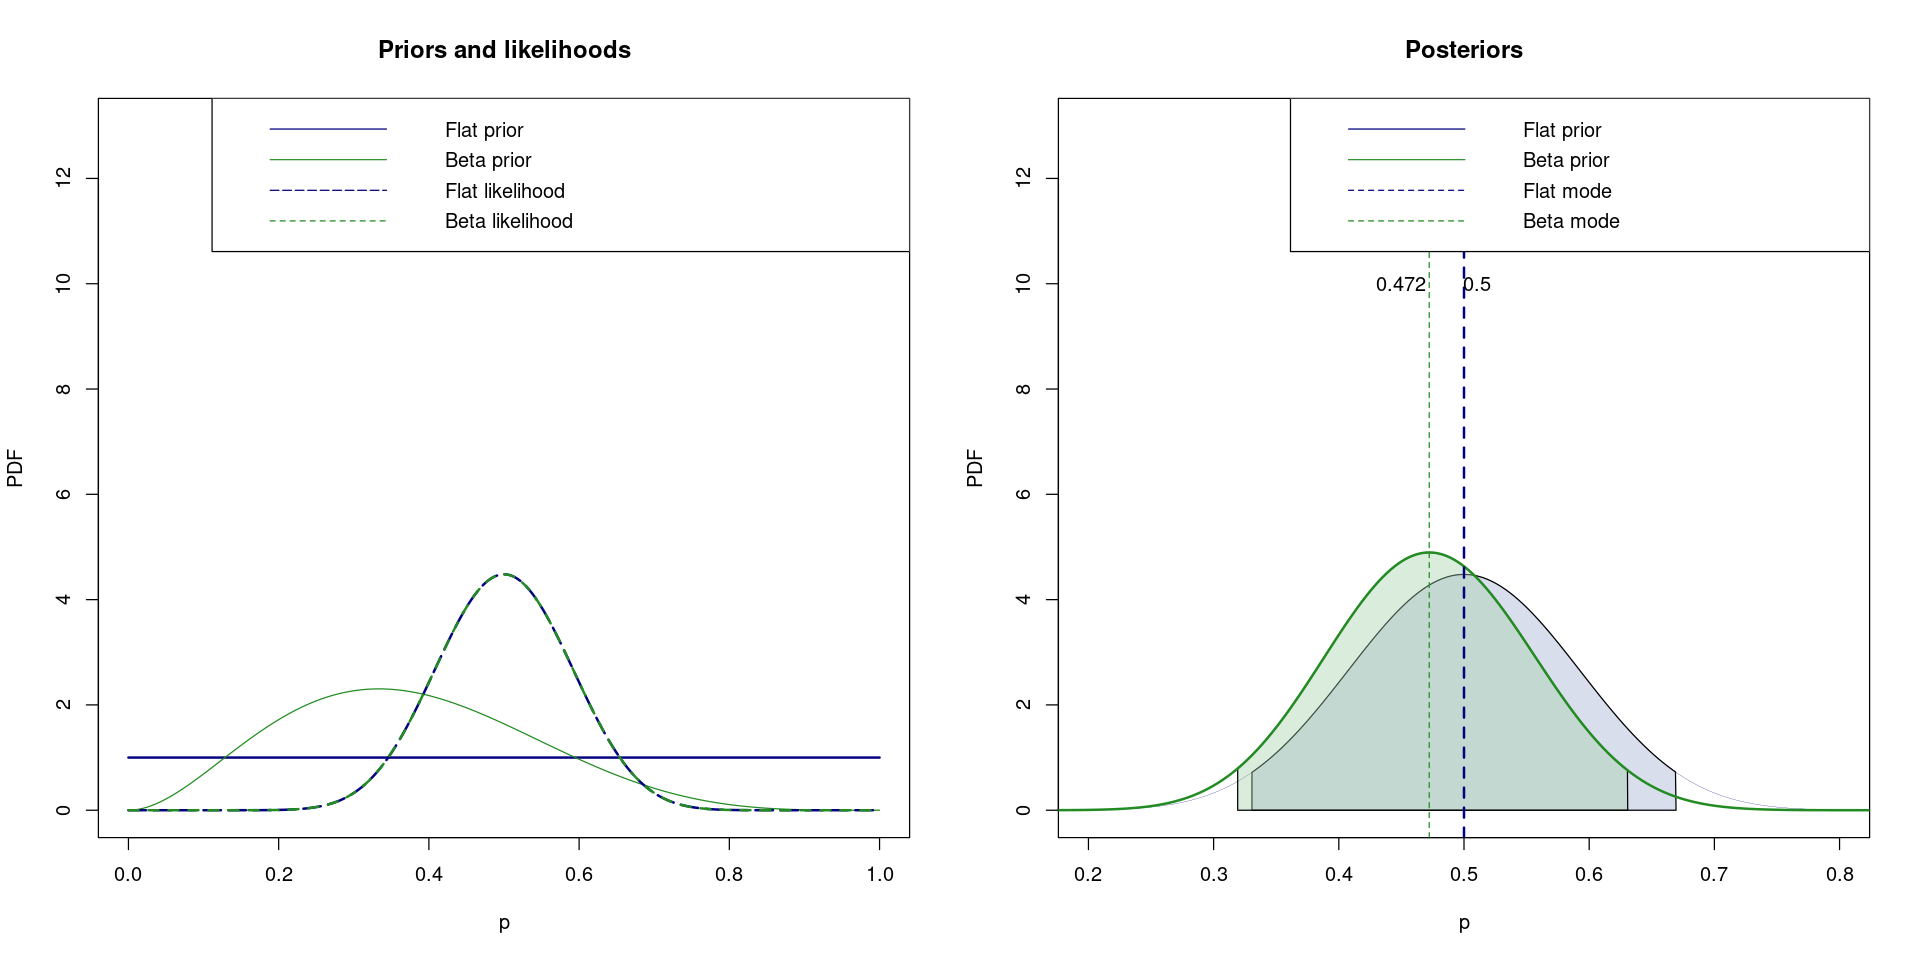

In [16]:
layout(mat = matrix(c(1, 2), 
                        nrow = 1, 
                        ncol = 2),
       heights = c(2),    # Heights of the two rows
       widths = c(2, 2))     # Widths of the two columns

options(repr.plot.width=16, repr.plot.height=8)

#PRIORS
plot(x3, p.prior3.u,
col='navy',
type='l', lty=1, lwd = 2,
ylim=c(0,13),
xlim=c(0,1),
main='Priors and likelihoods',
xlab="p",
ylab='PDF')
lines(x3,p.prior3.b, col='forestgreen',lwd=1,lty=1)
lines(x3,p.like3.u, col='navy',lwd=2,lty=5)
lines(x3,p.like3.b, col='forestgreen',lwd=2,lty=2)
legend('topright', c('Flat prior','Beta prior','Flat likelihood','Beta likelihood'), col=c('navy','forestgreen','navy','forestgreen'), lty=c(1,1,5,2), bty = 'o')

#POSTERIORS
plot(x3, p.post3.u,
col='navy',
type='l', lty=1, lwd = .2,
ylim=c(0,13),
xlim=c(0.2,0.8),
main='Posteriors',
xlab="p",
ylab='PDF')
x3.95u <- seq(u.left, u.right, by=dx3)
polygon(x = c(u.left,x3.95u,u.right),
       y = c(0,dbeta(x3.95u,u.post.alpha,u.post.beta),0),
       col=alpha('#9daed1',0.4))
x3.95b <- seq(b.left, b.right, by=dx3)
polygon(x = c(b.left,x3.95b,b.right),
       y = c(0,dbeta(x3.95b,b.post.alpha,b.post.beta),0),
       col=alpha('#a4d0a7',0.4))
lines(x3,p.post3.b, col='forestgreen',lty=1,lwd=2)
abline(v=u.bmode,lty=2,lwd=2,col='navy')
text(x=0.45,y=10,label=round(b.bmode,3))
abline(v=b.bmode,lty=2,lwd=1,col='forestgreen')
text(x=0.51,y=10,label=round(u.median,3))
legend('topright', c('Flat prior','Beta prior','Flat mode', 'Beta mode'), col=c('navy','forestgreen','navy','forestgreen'), lty=c(1,1,2,2), bty ='o')

options(repr.plot.width=4, repr.plot.height=4)

2. Evaluate the most probable value for the coin probability $p$ and, integrating the posterior probability distribution, give an estimate for a $95\%$ credibility interval.

In [17]:
cat(' - - - - Uniform prior - - - - \n')
cat('The posterior gives back a Mean =',u.bmean,', Mode =',u.bmode,'and Median =',u.median,'\n')
cat('The best estimate of π is the mode of the posterior: π = r/n = ', u.bmode, 'with the 95% Confidence Interval being [',u.left,',',u.right,']\n')


cat(' - - - -  (',alpha3,',',beta3,') Beta prior - - - - \n')
cat('The posterior gives back a Mean =',b.bmean,', Mode =',b.bmode,'and Median =',b.median,'\n')
cat('The best estimate of π is the mode of the posterior: π = ', b.bmode, 'with the 95% Confidence Interval being [',b.left,',',b.right,']\n')

 - - - - Uniform prior - - - - 
The posterior gives back a Mean = 0.5 , Mode = 0.5 and Median = 0.5 
The best estimate of π is the mode of the posterior: π = r/n =  0.5 with the 95% Confidence Interval being [ 0.330606 , 0.669394 ]
 - - - -  ( 3 , 5 ) Beta prior - - - - 
The posterior gives back a Mean = 0.4736842 , Mode = 0.4722222 and Median = 0.4732177 
The best estimate of π is the mode of the posterior: π =  0.4722222 with the 95% Confidence Interval being [ 0.3192141 , 0.6307804 ]


3. Repeat the same analysis assuming a sequential analysis of the data. Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e.  from 1 to 30).

Recursive single-measure inference over 30 measures. The posterior of the $n$ measure serves as prior for the $n+1$ inference calculation.
I need 3 vectors for each prior(initial prior = Uniform or Beta): mode, left bound CI, right bound CI.

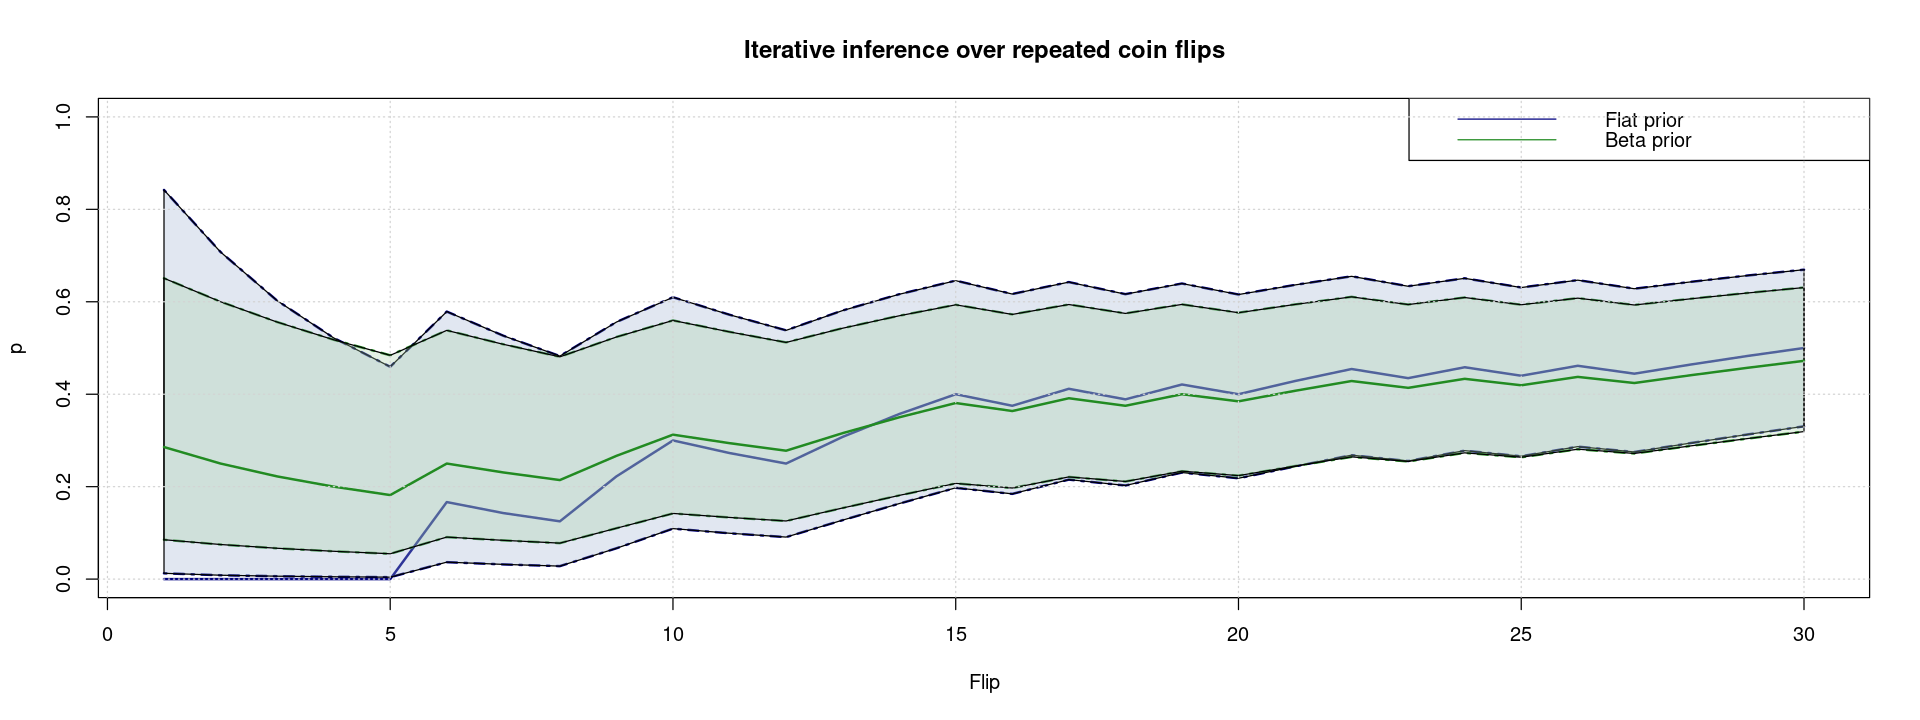

In [18]:
T <- 0
H <- 1
dat3 <- c(T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H)
#u prior: beta(1,1)
u.lefts <- rep(0,times=30)
u.rights <- rep(0,times=30)
u.bmodes <- rep(0,times=30)
#b prior: beta(alpha3,beta3) = Beta(3,5)
b.lefts <- rep(0,times=30)
b.rights <- rep(0,times=30)
b.bmodes <- rep(0,times=30)

#beta.mode(alpha3,beta3,n,r)
ualpha = 1;ubeta=1;balpha=alpha3;bbeta=beta3
q=0.025
for(i in 1:30){
    #print(dat3[i])
    rr = dat3[i]

    u.bmodes[i] <- beta.mode(ualpha,ubeta,1,rr)
    b.bmodes[i] <- beta.mode(balpha,bbeta,1,rr)

    ualpha <-rr+ualpha
    ubeta <- 1-rr+ubeta
    balpha <-rr+balpha
    bbeta <- 1-rr+bbeta 

    u.lefts[i] <- qbeta(q,ualpha,ubeta)
    u.rights[i] <- qbeta(1-q,ualpha,ubeta)
    b.lefts[i] <- qbeta(q,balpha,bbeta)
    b.rights[i] <- qbeta(1-q,balpha,bbeta)

}

options(repr.plot.width=16, repr.plot.height=6)

plot(1:30,u.bmodes,
type='l',lty=1,lwd=2,
col='navy',
ylim=c(0.,1),
main = 'Iterative inference over repeated coin flips',
xlab = 'Flip',
ylab = 'p')
lines(1:30,u.lefts, col='navy',lty=4,lwd=2)
lines(1:30,u.rights, col='navy',lty=4,lwd=2)
lines(1:30,b.lefts, col='forestgreen',lty=4,lwd=2)
lines(1:30,b.rights, col='forestgreen',lty=4,lwd=2)
polygon(x = c(1:30,30:1),
       y = c(u.rights,rev(u.lefts)),
       col=alpha('#9daed1',0.3))
polygon(x = c(1:30,30:1),
       y = c(b.rights,rev(b.lefts)),
       col=alpha('#a4d0a7',0.3))

lines(1:30,b.bmodes, col='forestgreen',lty=1,lwd=2)
legend('topright', c('Flat prior','Beta prior'), col=c('navy','forestgreen'), lty=1, bty ='o')
grid()

#polygon(c(n.seq,rev(n.seq)), c(p.max.unif,rev(p.min.unif)), col=adjustcolor("navy",alpha.f=0.2), bor=NA)


After an initial stretch of 5 Tails, the expected probability $p$ adjusts until it reaches a value around $0.5$. The Tail-skewed Beta prior gives a $p<0.5$ due to its inherent bias; this of course is not formally correct, because the prior should be chosen before looking at the data. As a confirmation of this, $p$ is underestimated.

In [19]:
cat('In the iterative way: \n Uniform prior gives mode = ',u.bmodes[30],'\n Beta prior gives mode = ',b.bmodes[30])

In the iterative way: 
 Uniform prior gives mode =  0.5 
 Beta prior gives mode =  0.4722222

4. Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis (i.e. considering all the data as a whole)?

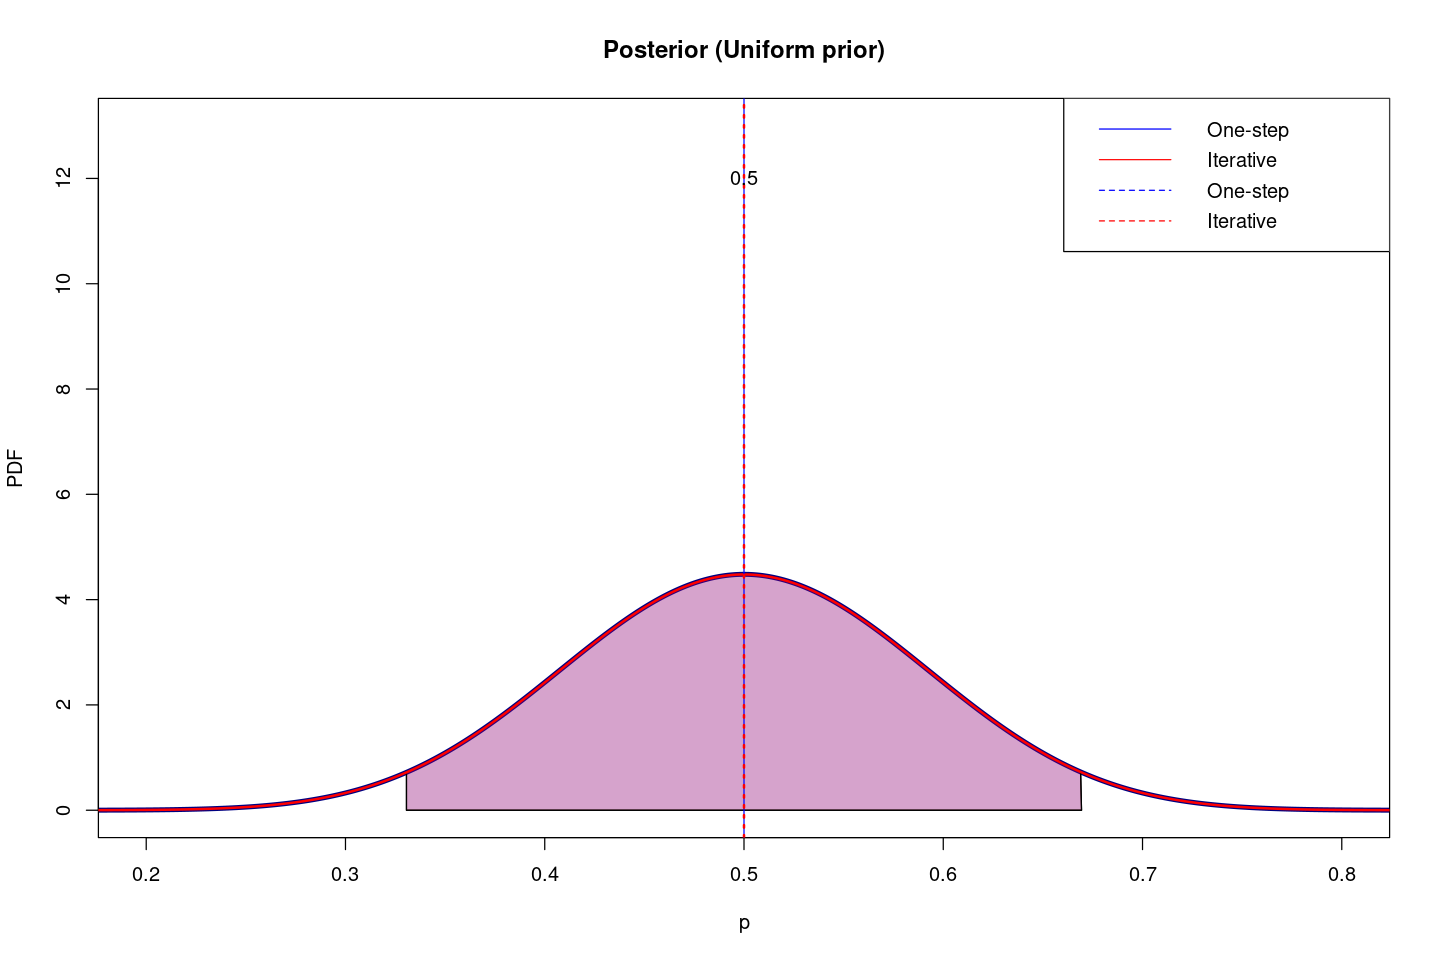

In [20]:
options(repr.plot.width=12, repr.plot.height=8)

plot(x3, p.post3.u,
col='navy',
type='l', lty=1, lwd = 4,
ylim=c(0,13),
xlim=c(0.2,0.8),
main='Posterior (Uniform prior)',
xlab="p",
ylab='PDF')
x3.95u <- seq(u.left, u.right, by=dx3)
polygon(x = c(u.left,x3.95u,u.right),
       y = c(0,dbeta(x3.95u,u.post.alpha,u.post.beta),0),
       col=alpha('blue',0.2))

x3.95i <- seq(u.lefts[30], u.rights[30], by=dx3)
polygon(x = c(u.lefts[30],x3.95i,u.rights[30]),
       y = c(0,dbeta(x3.95i,ualpha,ubeta),0),
       col=alpha('red',0.2))

lines(x3,dbeta(x3,ualpha,ubeta), col='red',lty=1,lwd=2)

abline(v=u.bmode,lty=1,lwd=1,col='blue')
text(x=0,u.bmode,y=10,label=round(u.bmode,3))
abline(v=u.bmodes[30],lty=3,lwd=2,col='red')
text(x=u.bmodes[30],y=12,label=round(u.bmodes[30],3))
legend('topright', c('One-step','Iterative','One-step','Iterative'), col=c('blue','red','blue','red'), lty=c(1,1,2,2), bty ='o')

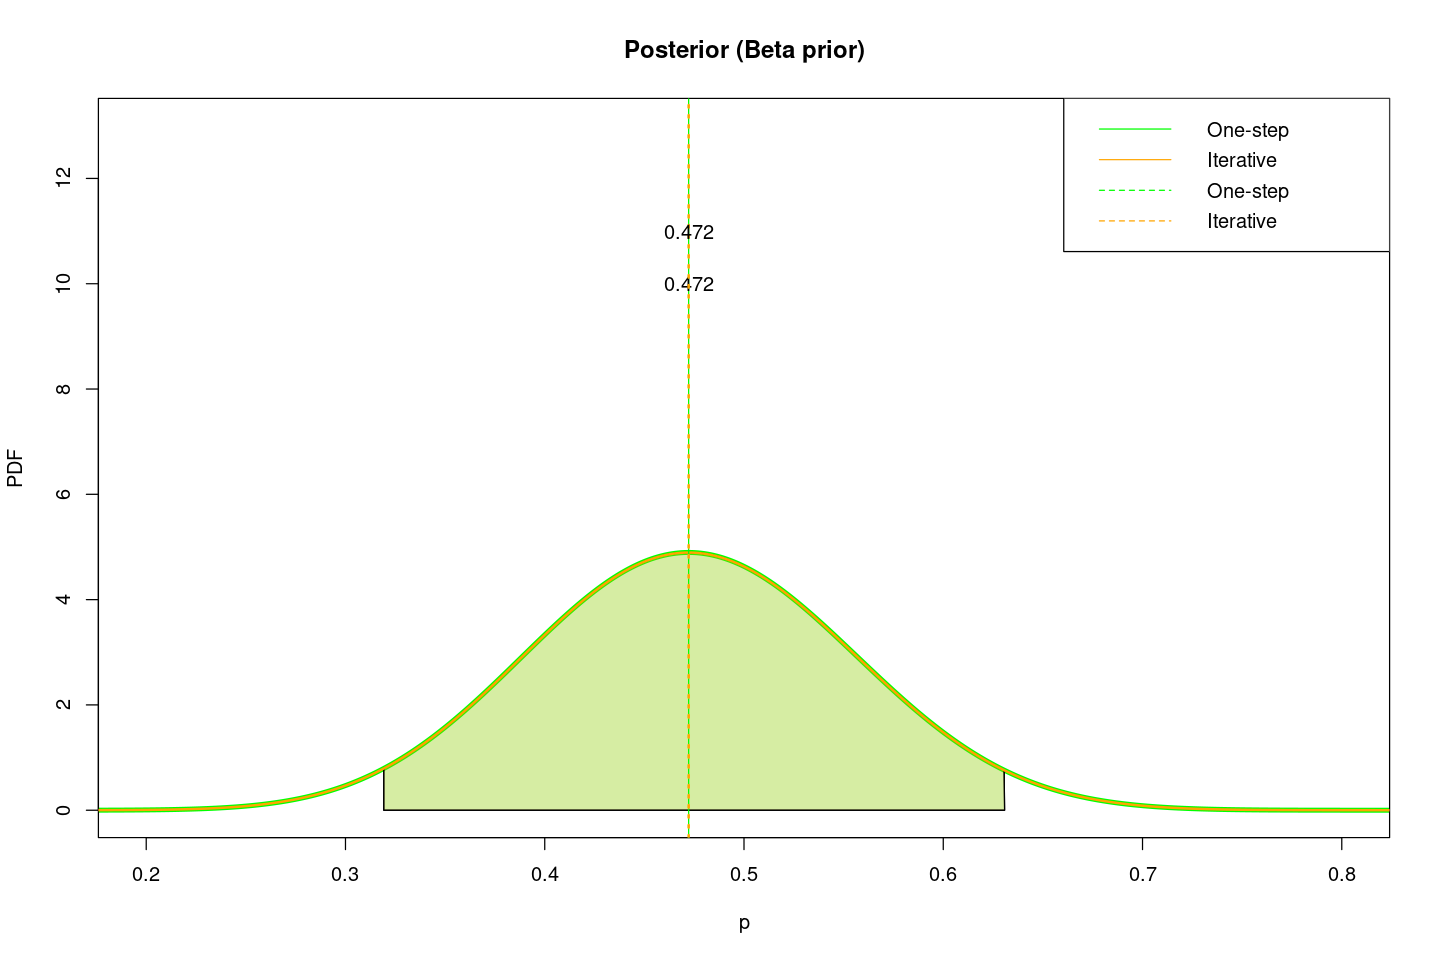

In [21]:
plot(x3, p.post3.b,
col='green',
type='l', lty=1, lwd = 4,
ylim=c(0,13),
xlim=c(0.2,0.8),
main='Posterior (Beta prior)',
xlab="p",
ylab='PDF')
x3.95b <- seq(b.left, b.right, by=dx3)
polygon(x = c(b.left,x3.95b,b.right),
       y = c(0,dbeta(x3.95b,b.post.alpha,b.post.beta),0),
       col=alpha('green',0.2))

x3.95n <- seq(b.lefts[30], b.rights[30], by=dx3)
polygon(x = c(b.lefts[30],x3.95n,b.rights[30]),
       y = c(0,dbeta(x3.95n,balpha,bbeta),0),
       col=alpha('orange',0.2))

lines(x3,dbeta(x3,balpha,bbeta), col='orange',lty=1,lwd=2)

abline(v=b.bmode,lty=1,lwd=1,col='green')
text(x=b.bmode,y=10,label=round(b.bmode,3))
abline(v=b.bmodes[30],lty=3,lwd=2,col='orange')
text(x=b.bmodes[30],y=11,label=round(b.bmodes[30],3))
legend('topright', c('One-step','Iterative','One-step','Iterative'), col=c('green','orange','green','orange'), lty=c(1,1,2,2), bty ='o')

As we can (not) see, there is no difference between the posteriors computed in the last iterative step and those coming from point 3.1.

# Ex. 4: The 6 boxes toy model

Write a program in R that performs a simulation of the process:
1. after selecting a random box
2. make random sampling from the box
3. prints on the standard output the probability of selecting each box
4. plot the probability for each box as a function of the number

In [22]:
library(ggplot2)
library(tibble)
library(data.table)
set.seed(12346)
N <- 5; i <- 0:N;  
n <- 100 
pwhite <- i/N; #box 0: all blacks ; box 5: all whites
mystery.box <- 2 # choose mistery box

In [23]:
extractions <- rbinom(n,1,pwhite[mystery.box+1]) # sequence of random extractions with (unknown) probability pwhite[mystery box]
whites <- sum(extractions) # nr of white
pBox_i <- pwhite^whites * (1-pwhite)^(n-whites) / sum( pwhite^whites * (1-pwhite)^(n-whites) ) # belief to have picked Bi
pWhite <- sum( pwhite * pBox_i ) # prob to get white in the next extraction
cat('The probability of having mistery box = ',which(pBox_i==max(pBox_i))-1,'is',round(max(pBox_i)*100,2),
    '%; the probability of finding white in the',n+1,'extraction is',round(pWhite*100,2),'%')

The probability of having mistery box =  2 is 99.85 %; the probability of finding white in the 101 extraction is 39.97 %

In [24]:
whites

[1] 36

In [25]:
cumw <- cumsum(extractions) # cumulative sum of white balls 
# matrix with extraction history 
pBox_it <- matrix(data=NA, nrow = n, ncol = 6) 
for (i in 1:n){ #pBox is just a binomial
    pBox_it[i,] <- pwhite^cumw[i] * (1-pwhite)^(i-cumw[i]) / sum( pwhite^cumw[i] * (1-pwhite)^(i-cumw[i]) )
}

pBox_it <- cbind(pBox_it, 1:n)
colnames(pBox_it) <- c(0:N, 'Turn') # box index + number of trial

cumw 

[1]  1  1  1  1  2  3  3  3  3  4  5  6  6  6  6  6  7  7  8  8  8  9 10 10 10
 [26] 10 10 10 11 11 11 12 12 12 12 12 12 12 13 14 14 14 14 15 15 15 15 15 15 15
 [51] 15 15 16 16 17 17 17 17 18 18 19 19 19 19 19 20 20 21 21 21 22 22 23 24 24
 [76] 24 25 26 26 27 27 27 27 28 28 29 29 30 31 31 31 31 32 33 33 34 35 36 36 36

In [26]:
#pBox_it2 <- data.table(pBox_it) # to data table
pBox_it2 <- as_tibble(pBox_it)
#PBi_t <- reshape2::melt(PBi_t, id='NumTrial') # to plot
pBox_it2 <- pBox_it2 %>% add_column(extractions, .before = 0)

tail(pBox_it2,20)

extractions,0,1,2,3,4,5,Turn
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0.0399192181,0.9600639,1.689803e-05,2.215962e-18,0,81
0,0,0.0525269748,0.9474619,1.111748e-05,7.289582e-19,0,82
0,0,0.0688310590,0.9311617,7.284145e-06,2.388057e-19,0,83
1,0,0.0356420394,0.9643466,1.131561e-05,4.946327e-19,0,84
0,0,0.0469649211,0.9530276,7.455194e-06,1.629423e-19,0,85
1,0,0.0240470549,0.9759415,1.145166e-05,3.337199e-19,0,86
0,0,0.0318078992,0.9681845,7.573762e-06,1.103558e-19,0,87
1,0,0.0161609107,0.9838275,1.154420e-05,2.242777e-19,0,88
1,0,0.0081462336,0.9918363,1.745726e-05,4.522068e-19,0,89


The table above displays the probability that each box has of being the mystery box, at each extraction turn. Below, a plot shows the results. 

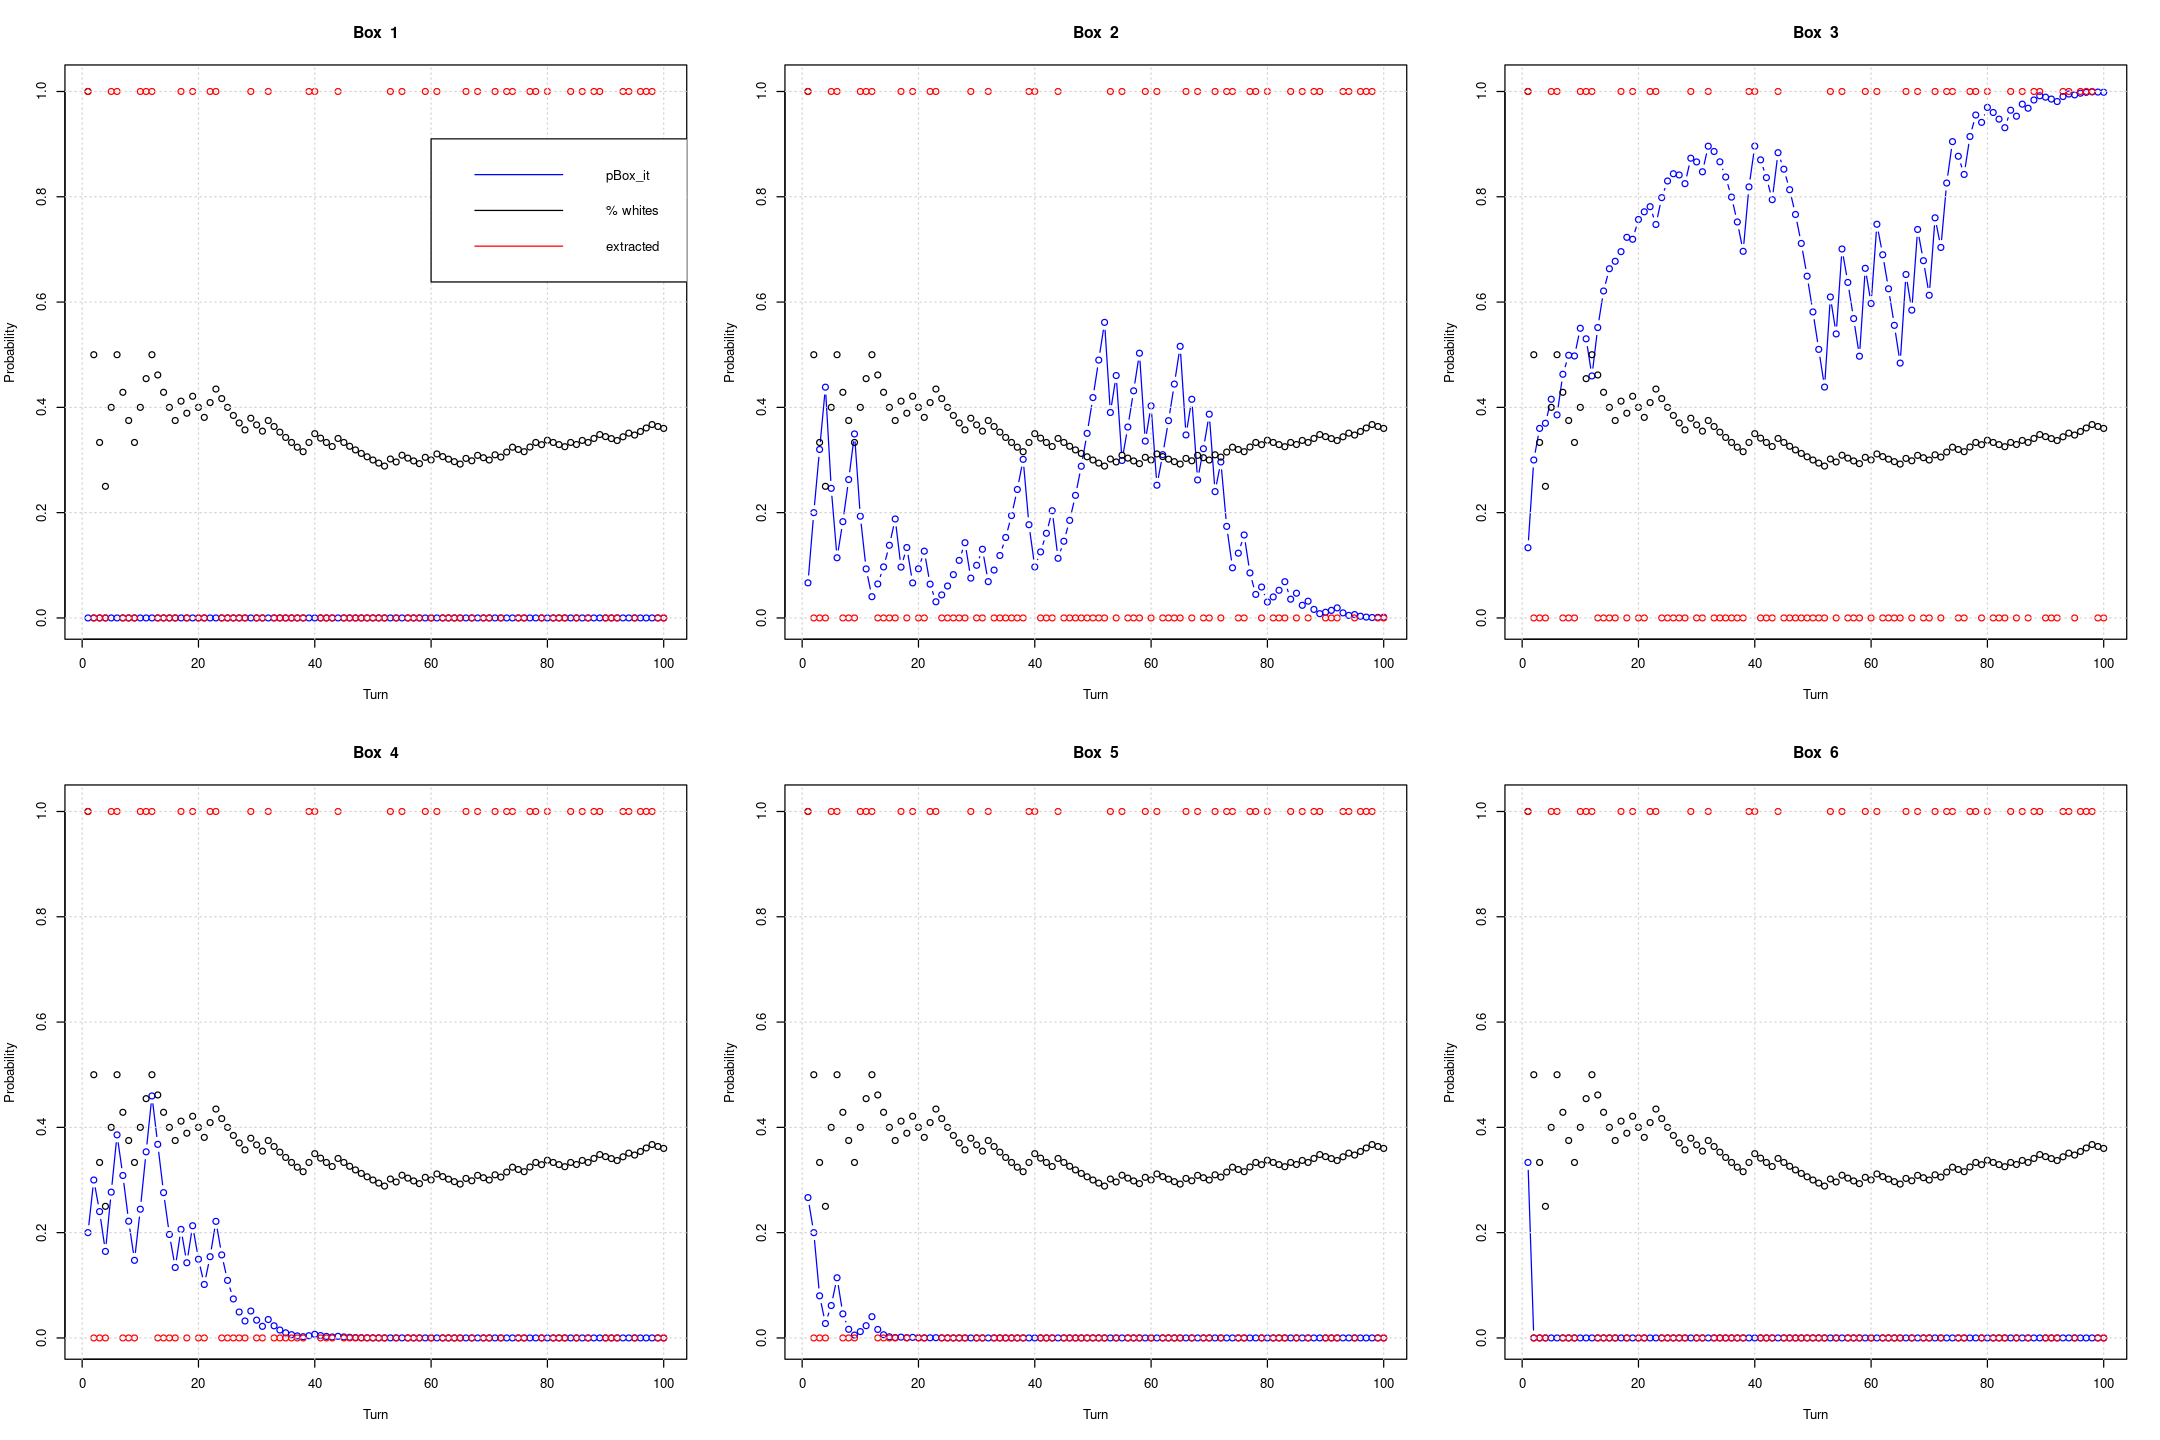

In [27]:
#PLOT
options(repr.plot.width=18, repr.plot.height=12)

layout(mat = matrix(c(1, 4, 2, 5, 3, 6), 
                        nrow = 2, 
                        ncol = 3),
       heights = c(2,2),    # Heights of the two rows
       widths = c(2, 2,2))     # Widths of the two columns

for (i in 1:6){
plot(1:n,pBox_it[,i],
main=paste('Box ',i),
xlab='Turn',
ylab='Probability',
ylim=c(0,1.01),
type='b',
col='blue')
points(1:n,cumw/(1:n))
points(1:n,extractions,col='red')
grid()
if(i==1){
legend(0.6*n,.91, c('pBox_it','% whites','extracted'), col=c('blue','black','red'), lty=c(1,1), bty ='o')}
}


As we expect, the most probable box is exactly the mystery box. We can see that in the Box 3 plot there is a 'dubious' phase around turns $[40,60]$, in which our program sees a shortage of whites and starts to consider again Box number 2. Then $whites$ returns around its expected value and Box 3 is locked in.